

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> 
    noshowappointments refers to very big collected data about the patients and their reactions with attendance in their appointments 
    we compare with those patients based on different feature that have different effects on the attendance of the patient 
    feature are :
    'PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay' ----> its importance is just to count and arrange appointments 
       , 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension','Gender'
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',   ----> shows the real features that affect the attendance and thy are different in their effects
       
        'No_show' ---------------> is the target we aim to improve and we try to see the effect of other features on it


### Question(s) for Analysis
>**Tip**
##### Research Question 1  (Does the Handcap affects the attendance of the patient ?!)

##### Research Question 2  (Does receiving SMS affect Showing ? !)
##### Research Question 3  (Does Age has an eefect on showing !)

##### Research Question 4  (Does chronic diseases and Alcoholism have an efect on showing !)


##### Research Question 5  (Does gender has an efect on showing !)

##### Research Question 6  (Does Scholarship has an efect on showing !)
##### Research Question 7  (Does Neighbourhood has an efect on showing !) 

In [36]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [13]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0;

    100% |████████████████████████████████| 10.5MB 3.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.4MB/s eta 0:00:01   15% |████▉                           | 2.0MB 27.4MB/s eta 0:00:01    45% |██████████████▍                 | 6.0MB 27.4MB/s eta 0:00:01    54% |█████████████████▋              | 7.4MB 27.4MB/s eta 0:00:01    92% |█████████████████████████████▊  | 12.4MB 27.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [37]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# After discussing the structure of the data and any problems that need to be


In [38]:
df_appointments.shape

(110527, 14)

# so we have the number of features is 14 

# and the number of rows/examples is 110527

In [39]:
df_appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

so we see that our features are :
1- PatientId   2- AppointmentID 3- Gender 4-ScheduledDay 5- AppointmentDay   6- Age  7- Neighbourhood
8- Scholarship, 9-Hipertension, 10-iabetes, 11-Alcoholism, 12-Handcap 13- SMS_received 14- No-show

# We notice that there is some mistakes in the naming of the feature we need to change them correctly

In [40]:
df_appointments.rename(columns = {'Hipertension' : 'Hypertension'},  inplace = True)
df_appointments.rename(columns = {'No-show' : 'No_show'}, inplace = True)

# we need to see those changes:

In [41]:
df_appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [9]:
df_appointments.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

We notice that the rows with 'False' output mean that there is no reduntancy but we can use the function sum() to ensure that 

In [42]:
print('the number of duplicates in the rows is')
print(df_appointments.duplicated().sum())

the number of duplicates in the rows is
0


# The previous result indcates the duplicats in a whole row, but we may find similar examples that they are
# not completely duplicated but they have the same result in some feature 
# for example we can find a patient who has more than one appointment  

In [43]:
unique_appointments = df_appointments['PatientId'].nunique()
print('the unique appointments = ')
print(unique_appointments)

the unique appointments = 
62299


# So there is the previous number of pateints which may take several appointments so there is a reduntancy for the same patient or we can say that those pateints took many appointments with differernt times

In [44]:
number_appointments  = df_appointments.shape[0]
print('the total number of appointments is')
print(number_appointments)

the total number of appointments is
110527


# the reduntancy we should have nuber of appointments equals to (the total number of reduntancy) - (the unique appointmentas we have get) 
# or we can get the reduntancy by using the function duplicated directly

In [45]:
reduntancy =df_appointments['PatientId'].duplicated().sum()
print('reduntancy of the same patient = ')
print(reduntancy)

print('the unique patients = ')
print(number_appointments - reduntancy)

reduntancy of the same patient = 
48228
the unique patients = 
62299


# the target we aim to know it the feature 'No show' and we have many patients that took many appointments so we need to know there responses in each appointment if they are different so each appointment has an effect on the target 
# and if they are the same then there is no need to take both of them during the calculations 

# In data analysis and Machine Learning, it we be better  for the speed of the caculations to reduce the number of duplicates in both examples and the unnecessary features 

In [48]:

redunantancy_of_patients = df_appointments.duplicated((['PatientId','No-show']))
# if it says "KeyError: Index(['No-show']" that does mean that I changed that column name already in the following
#code and that is reflected on the original dataframe so after the first run it will not remain find a column 
#'No-show' it will find it as 'No_show'

#comment the  previous command if that error happened
# and if you want see it correctly UNCOMMENT the following command
#redunantancy_of_patients = df_appointments.duplicated((['PatientId','No_show']))
print(redunantancy_of_patients.sum())

38710


# we need to see some general information about the dataframe:

In [49]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# By comparing that result and the result we have got in the first when we got the number if rows/examples of the dataframe we can conclude that there are no 
# "Nan" or missing values 
# ===========================================================================

# we can also see mathematical calculations about the data of each feature by using descibe function

In [50]:
df_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# we see that all features have meaningful values except the feature of "Age" because it says that the minimum age is (-1) which by logic is incorrect and we need to fix that value

In [51]:
index_of_invalid_age = df_appointments.index[df_appointments['Age'] == -1].tolist()
print(index_of_invalid_age)

[99832]


# so just have one invalid or uncessary examples so we can remove it 

# we can write a function to do that task as we can use it many times

In [52]:
def drop_columns(index_number):
    df_appointments.drop(index_number, inplace = True)

# we use the function to delete the invalid age

In [53]:
drop_columns(index_of_invalid_age)

# call the describe function again to see if the invalid age is removed

In [54]:
df_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# we can get also get the index of the reduntancy in patients we got before

In [55]:
index_repeated = df_appointments.index[df_appointments.duplicated((['PatientId','No_show']))].tolist()
#print(index_of_invalid_age)
#uncomment the prevous command if you want to see the indicied

#  we use those indices to remove thes rduntancy

In [56]:
drop_columns(index_repeated)

In [63]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 14 columns):
PatientId         71816 non-null float64
AppointmentID     71816 non-null int64
Gender            71816 non-null object
ScheduledDay      71816 non-null object
AppointmentDay    71816 non-null object
Age               71816 non-null int64
Neighbourhood     71816 non-null object
Scholarship       71816 non-null int64
Hypertension      71816 non-null int64
Diabetes          71816 non-null int64
Alcoholism        71816 non-null int64
Handcap           71816 non-null int64
SMS_received      71816 non-null int64
No_show           71816 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 8.2+ MB


# now we have unique patients =  71816

In [58]:
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# now we have unique data and also we can reduce the number of features to incease tha speed of the mathematical calculations by removeing the unnecessary columns: 

In [59]:
df_appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [78]:
df_appointments.drop(['AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)
df_appointments.columns

Index(['PatientId', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_show'],
      dtype='object')

In [60]:
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### we can take a look at the data by histograms

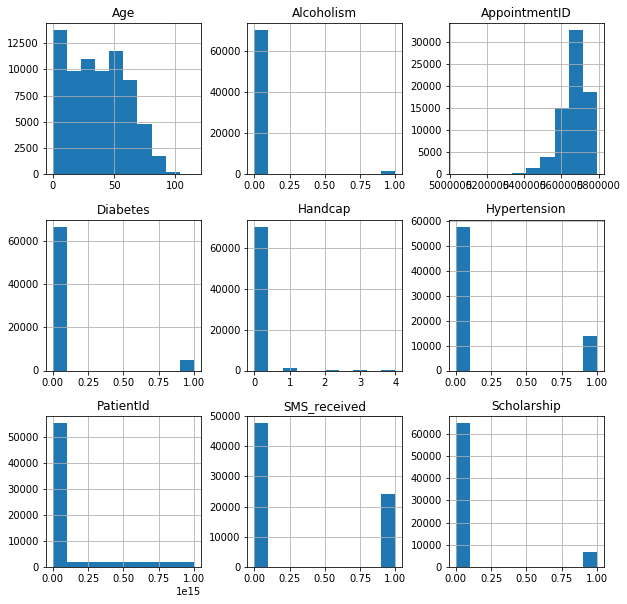

In [64]:
df_appointments.hist(figsize = (10, 10));
# the histograms tell us about a big variance among the patients in theor response corresponding with 
#different featrues

## we need also to split who come or show in a group and who did not show in another group to compare between them

In [65]:
come = df_appointments.No_show == 'No'
did_not_come = df_appointments.No_show == 'Yes'

In [66]:
df_appointments[did_not_come].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [67]:
df_appointments[come].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### we need to see the number of patients in each group

In [68]:
number_of_Noshow_patients = df_appointments[did_not_come].shape[0]
print('the number of Noshow patients = ')
print(number_of_Noshow_patients)

the number of Noshow patients = 
17663


In [69]:
number_of_show_patients = df_appointments[come].shape[0]
print('the number of show patients = ')
print(number_of_show_patients)

the number of show patients = 
54153


In [70]:
# to ensure that is coreect
# we can add both number to get the whole number of patients again
print(number_of_Noshow_patients + number_of_show_patients)

71816


### we can see the relation between those two groups 

In [71]:
print('the number of show patients to the number of Noshow patients = ')
print(int(number_of_show_patients / number_of_Noshow_patients))

the number of show patients to the number of Noshow patients = 
3


#  Now we have good data to ask our questions that connect the features with the target to see their effects

### Research Question 1  (Does the Handcap affects the attendance of the patient ?!)


##### we can have a function to perform that relationship between each feature and the target 'No_show'

In [72]:
def effect_on_Showing(dataframe, feature, show, Noshow):
    plt.figure(figsize = [10,5])
    dataframe[feature][did_not_come].hist(alpha = .5, bins = 5, color = 'blue', label = 'did not come')
    dataframe[feature][come].hist(alpha = .5, bins = 5, color = 'red', label = 'come')
    plt.legend();
    plt.title('feature effect on showing')
    plt.xlabel('feature')
    plt.ylabel('patients');

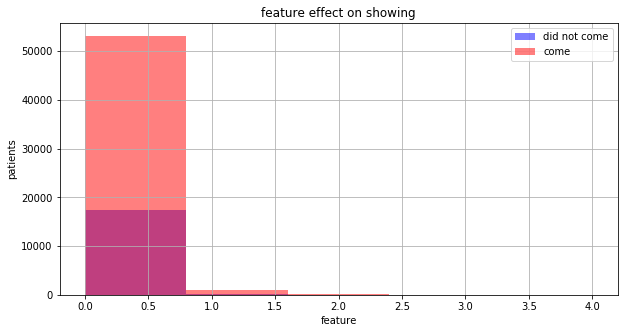

In [73]:
effect_on_Showing(df_appointments, 'Handcap', come , did_not_come)

# we see that most of patients that does not have handcap came and 'show'
# but also there is some patients with Handcap did not attened
## we can see that Handcap did not prevent those patients from coming 

### Research Question 2  (Does receiving SMS affect Showing ? !)

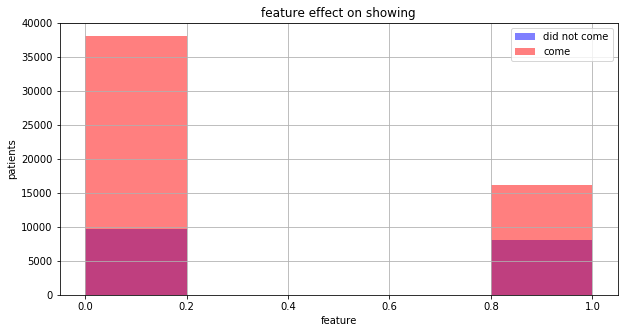

In [75]:
effect_on_Showing(df_appointments, 'SMS_received', come , did_not_come)

### we can see that the number of patients who did not recieve SMS and come is more than the number of patients who recieved and come 
## so we notice that there is a problem with the SMS and we should impove its work or we can change its content for example 

### Research Question 3  (Does Age has an eefect on showing !)

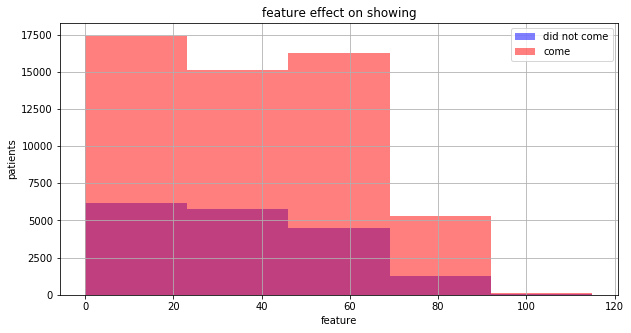

In [76]:
effect_on_Showing(df_appointments, 'Age', come , did_not_come)

## number of younger patients are bigger than the number of older patients
## we note that the kids patients with age prom babies to 20 years most of them attend thier appointments that reflect their family caring 
## the oldest patients sometimes lose thier appointments
# ==================================

### Research Question 4  (Does chronic diseases and Alcoholism have an efect on showing !)


In [77]:
df_appointments[come].groupby(['Hypertension', 'Diabetes']).mean()['Alcoholism']


Hypertension  Diabetes
0             0           0.017156
              1           0.046575
1             0           0.051582
              1           0.035759
Name: Alcoholism, dtype: float64

### we can find that Alcoholism does not have a clear effect on the attendance of the patient due to the small difference in the precentage of the attendance

### Research Question 5  (Does gender has an efect on showing !)


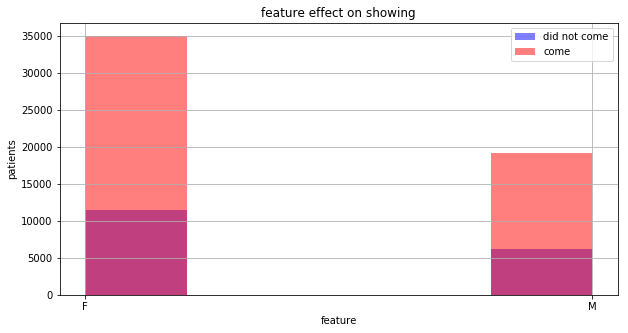

In [78]:
effect_on_Showing(df_appointments, 'Gender', come , did_not_come)

## we can see that the same precentage between the number of 'Show' and 'Noshow' almost is the same in both genders; male and female 
### so we can say that there is no effect on the attendance due to the gender
## ===================================

### Research Question 6  (Does Scholarship has an efect on showing !)

In [79]:
df_appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

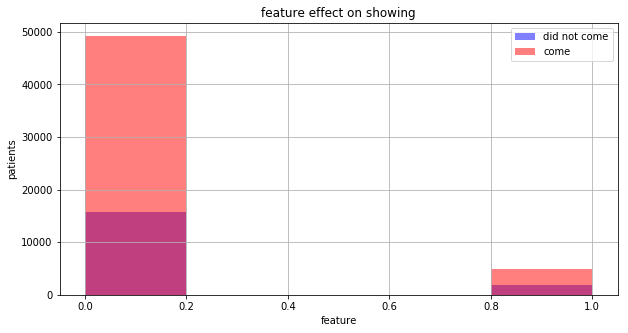

In [80]:
effect_on_Showing(df_appointments, 'Scholarship', come , did_not_come)

##  we can say that Scholarship does not  has a big effect on attendance

### Research Question 7  (Does Neighbourhood has an efect on showing !)

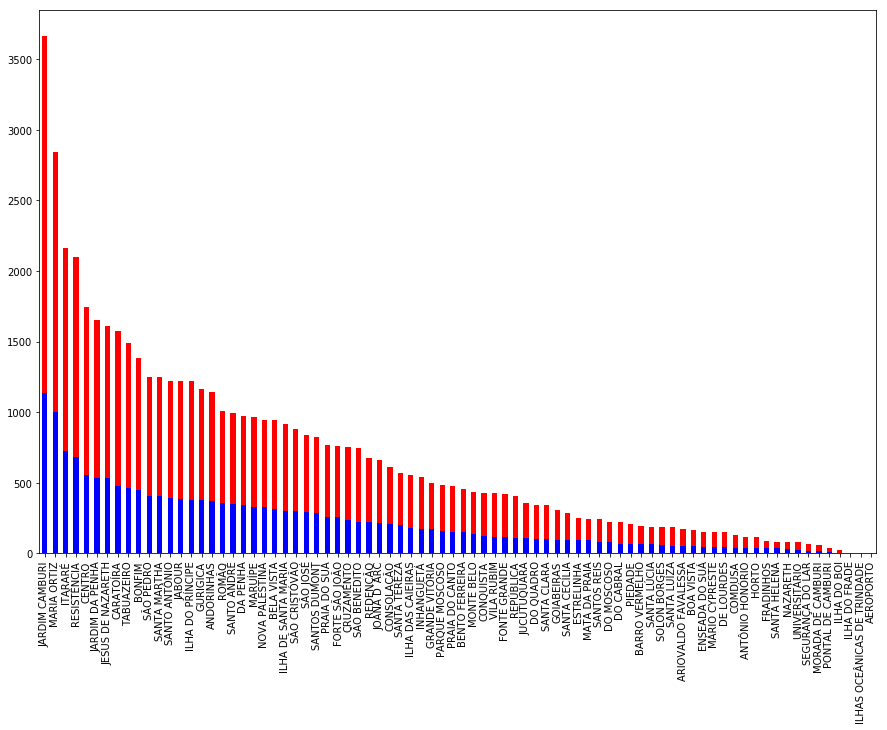

In [104]:
plt.figure(figsize = [15,10])
#hist = df_appointments['Neighbourhood'].count_values(). hist(bins = 10, figsize = [20,5])
df_appointments.Neighbourhood[come].value_counts().plot(kind = 'bar', color = 'red', label = 'show')
df_appointments.Neighbourhood[did_not_come].value_counts().plot(kind = 'bar', color = 'blue', label = 'Noshow');


##  we can see a big different due to the feauter of  Neighbourhood
### so we have to give attention to that feature to improve the patients' response

<a id='conclusions'></a>
## Conclusions

### to conclude, I can say that Neighbourhood has a very effective role on the attendance of the patient
### also Attendance varies dirictly and obviously with the age of the patient, we can notice that childern patients have the highest attendance rate which reflects the families' caring and but  getting more older the rate dereasse until we reach the oldest patient with the lowest rate of attendance.
### We notice that SMS_received did not achieve its target corctly when we see the rate of non reciever is higher than who recived SMS so we should take an action 

## For limitations: 
### There are many useless features that do not have an effective relations with the target 'attendance'; features like gender, scholarships and handcap. there also many duplicates that reduced the spped of the caculations and that were not helpful so  they are reduntancy.


>

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0